In [1]:
import re, sys, math
import glob
import random
import json
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from collections import OrderedDict
import pandas as pd
from helper_utilities import *
from helper_plotutilities import *

%matplotlib inline

In [2]:
#explist256 = ['combined_1_3_256_epoch20', 'combined_1_3_256', 'combined_aug_1_3_256',\
# 'combined_drop_1_3_256','combined_aug_drop_1_3_256']
keys = ["samples", "logloss", "weighted_logloss","accuracy", "weighted_accuracy", "precision","recall", "f1_score", "true_positive", \
       "false_positive","true_negative","false_negative", "zero_contour_labels", "zero_contour_pred", \
       "missed_pred_lt_05", "missed_pred_gt_25", "missed_pred_gt_50", "missed_pred_eq_100"]

explist256 = [ 'combined_1_3_256', 'combined_aug_1_3_256', 'combined_drop_1_3_256','combined_aug_drop_1_3_256']

#image set that includes labels with zero contours in the training set
explist256_0 = ['combined_1_3_0_256', 'combined_aug_1_3_0_256', 'combined_1_3_0_256_drop','combined_1_3_0_256_dicecoef', 'combined_1_3_0_256_drop_dicecoef']

#explist176 = ['combined_1_3_176', 'combined_1_3_176_aug_dice', 'combined_1_3_176_aug_drop_dice']
explist176 = ['combined_1_3_176', 'combined_1_3_176_dice', 'combined_1_3_176_aug_dice', 'combined_1_3_176_drop_dice', 'combined_1_3_176_aug_drop_dice']

explist176_0 = ['1_3_0_176_bn','combined_1_3_0_176_dice', 'combined_1_3_0_176_aug_dice','combined_1_3_0_176_drop_dice', 'combined_1_3_0_176_aug_drop_dice', 'combined_1_3_0_176_aug_drop_dice2']


In [ ]:
RESULTS_PATH = '/masvol/heartsmart/unet_model/baseline/results/'
label_file176_0 = '/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy'

perf176_0_df = pd.DataFrame( keys, columns=["Attribute"] )
for results_file in explist176_0 :
    pred_file = RESULTS_PATH + results_file + '_predictions.npy'
    perf = compute_performance_statistics(label_file176_0, pred_file)
    perf176_0_df[results_file]= perf176_0_df['Attribute'].map(perf)
    

In [ ]:
perf176_0_df

In [ ]:
RESULTS_PATH = '/masvol/heartsmart/unet_model/baseline/results/'
label_file176 = '/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_labels.npy'

perf176_df = pd.DataFrame( keys, columns=["Attribute"] )
for results_file in explist176 :
    pred_file = RESULTS_PATH + results_file + '_predictions.npy'
    perf = compute_performance_statistics(label_file176, pred_file)
    perf176_df[results_file]= perf176_df['Attribute'].map(perf)
    

In [ ]:
perf176_df

In [ ]:
RESULTS_PATH = '/masvol/heartsmart/unet_model/baseline/results/'
label_file256 = '/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_labels.npy'

perf256_df = pd.DataFrame( keys, columns=["Attribute"] )
for results_file in explist256 :
    pred_file = RESULTS_PATH + results_file + '_predictions.npy'
    perf = compute_performance_statistics(label_file256, pred_file)
    perf256_df[results_file]= perf256_df['Attribute'].map(perf)

In [ ]:
RESULTS_PATH = '/masvol/heartsmart/unet_model/baseline/results/'
label_file256_0 = '/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_labels.npy'

perf256_0_df = pd.DataFrame( keys, columns=["Attribute"] )
for results_file in explist256_0 :
    pred_file = RESULTS_PATH + results_file + '_predictions.npy'
    perf = compute_performance_statistics(label_file256_0, pred_file)
    perf256_0_df[results_file]= perf256_0_df['Attribute'].map(perf)

In [ ]:
perf256_df

In [ ]:
file_name = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_perf_comparison_old.csv'
perf176_0_df.to_csv(file_name, sep='\t')

In [ ]:
file_name = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_perf_comparison_old.csv'
perf176_df.to_csv(file_name, sep='\t')

In [ ]:
file_name = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_perf_comparison.csv'
perf256_0_df.to_csv(file_name, sep='\t')

In [ ]:
file_name = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_perf_comparison.csv'
perf256_df.to_csv(file_name, sep='\t')

------------------------------
Model Parameters
tr_batchsize  :  32
tr_loss_fn  :  dice_loss
tr_dropout  :  True
tr_epoch  :  80
tr_lrrate  :  2e-05
tr_optimizer  :  Adam
tr_size  :  2437
tr_model_name  :  1_3_0_176_bn_drop
------------------------------
Evaluation on Test set
eval_loss  :  0.9686124929675349
eval_binary_accuracy  :  0.9479959395196703
eval_dice_coeff  :  0.03138750717043877
------------------------------
Values at first and last epoch
------------------------------
loss  :  0.8572330076062049 , 0.15910862980285262
dice_coeff  :  0.14276698899152893 , 0.8408913701971474
val_binary_accuracy  :  0.46213031938818633 , 0.9917821063370001
val_loss  :  0.8224110026828578 , 0.16152422936236271
val_dice_coeff  :  0.17758899804998618 , 0.8384757706376372
binary_accuracy  :  0.4419707139373865 , 0.9975999542356699
------------------------------
------------------------------


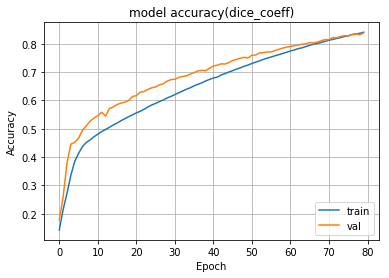

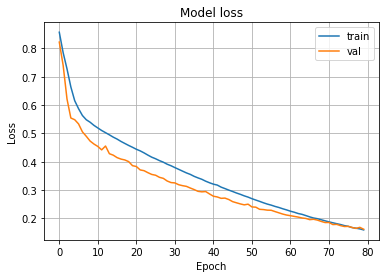

In [9]:
#hist = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_drop_dice_learning_history.json'
#hist = '/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn_learning_history.json'
hist = '/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn_drop_learning_history.json'

plot_learning_history(hist)

------------------------------
Model Parameters
tr_batchsize  :  32
tr_loss_fn  :  dice_loss
tr_size  :  9748
tr_dropout  :  False
tr_epoch  :  100
tr_lrrate  :  1e-05
tr_optimizer  :  Adam
tr_model_name  :  combined_1_3_0_256_aug_dice
------------------------------
Evaluation on Test set
eval_loss  :  0.9997060802247789
eval_binary_accuracy  :  0.9741965964988426
eval_dice_coeff  :  0.0002939221042820632
------------------------------
Values at first and last epoch
------------------------------
dice_coeff  :  0.3552384597883985 , 0.9741318110595394
val_binary_accuracy  :  0.978875748133048 , 0.9959368815177526
val_dice_coeff  :  0.5780966039192982 , 0.9483413615593543
val_loss  :  0.4219033970588293 , 0.05165863844064566
loss  :  0.6447615399746505 , 0.025868188940460606
binary_accuracy  :  0.7740360601310945 , 0.9975920093612936
------------------------------
------------------------------


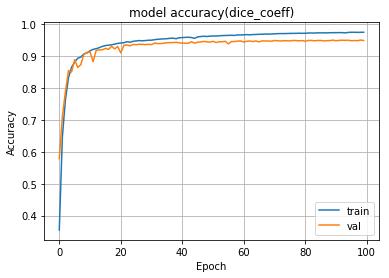

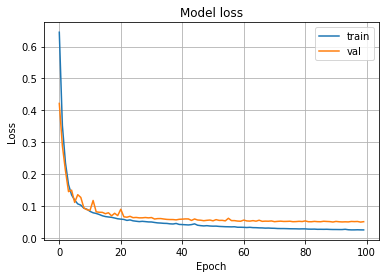

In [6]:
#hist = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_dicecoef_learning_history.json'
#hist = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_drop_dicecoef_learning_history.json'
#hist = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_learning_history.json'
hist = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_dice_learning_history.json'
#hist = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_dice_learning_history.json'

plot_learning_history(hist)

In [ ]:
perf176_df

------------------------------
Model Parameters
tr_batchsize  :  32
tr_loss_fn  :  dice_loss
tr_size  :  2437
tr_dropout  :  False
tr_epoch  :  100
tr_lrrate  :  5e-05
tr_optimizer  :  Adam
tr_model_name  :  1_3_0_256_dice
------------------------------
Evaluation on Test set
eval_binary_accuracy  :  0.9771518283420139
eval_dice_coeff  :  0.2081713447968165
eval_loss  :  0.7918286548720466
------------------------------
Values at first and last epoch
------------------------------
dice_coeff  :  0.1549251761847487 , 0.9722399735157156
val_binary_accuracy  :  0.8706824193235303 , 0.990670157260582
loss  :  0.8450748191361797 , 0.02776002648428442
val_dice_coeff  :  0.1962555258489046 , 0.855798821957385
val_loss  :  0.8037444734182514 , 0.14420117804261504
binary_accuracy  :  0.8650343507421268 , 0.9989956129569773
------------------------------
------------------------------


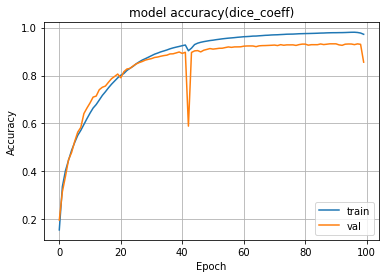

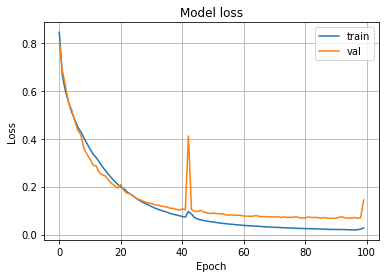

In [16]:
hist = '/masvol/heartsmart/unet_model/baseline/results/1_3_0_256_bn_dice_learning_history.json'
#hist = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_dice_learning_history.json'

plot_learning_history(hist)

In [ ]:
perf176_df

In [ ]:
for results_file in explist256 :
    history_file = RESULTS_PATH + results_file + '_learning_history.json'
    print ('='*30)
    print ('='*30)
    print ("Learning history of :" + results_file)
    print ('-'*30)
    
    plot_learning_history(history_file)
    

In [ ]:
for results_file in explist176 :
    history_file = RESULTS_PATH + results_file + '_learning_history.json'
    print ('='*30)
    print ('='*30)
    print ("Learning history of :" + results_file)
    print ('-'*30)
    
    plot_learning_history(history_file)

In [ ]:
# label_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_predictions.npy"
# y_true_f = np.load(label_file)
# y_pred_f = np.load(pred_file)
# p = get_performance_statistics(y_true_f, y_pred_f)
# print (p)

In [ ]:
# perf_file = "perf_values.json"
# print ("Saving Performance values", perf_file)
# with open(perf_file, 'w') as file:
#     json.dump(p, file, indent=2)
# print('-'*30)

## Analysis on training with 256x256  combined data set (ACDC + Sunnybrook)
### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

## Analysis on training with 256x256  combined data set (ACDC + Sunnybrook) (No labels with zero contours)

### data set prefix combined_1_3_256 

### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

In [ ]:
# zcontour = [50, 53, 72, 73, 116, 118, 145, 188]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_aug_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_aug_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_aug_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_drop_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_drop_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_drop_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_aug_drop_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_aug_drop_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_aug_drop_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


## Analysis on training with 256x256  combined data set (ACDC + Sunnybrook) + Labels with Zero Contours  
### data set prefix combined_1_3_0_256 
### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

In [ ]:
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_drop_dicecoef_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_drop_dicecoef_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [21, 84, 127, 220]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


------------------------------
Model Parameters
tr_batchsize  :  32
tr_loss_fn  :  dice_loss
tr_size  :  2437
tr_dropout  :  False
tr_epoch  :  100
tr_lrrate  :  1e-05
tr_optimizer  :  Adam
tr_model_name  :  combined_1_3_0_256_dice
------------------------------
Evaluation on Test set
eval_loss  :  0.9936035505047551
eval_binary_accuracy  :  0.9743197970920139
eval_dice_coeff  :  0.006396451167421657
------------------------------
Values at first and last epoch
------------------------------
dice_coeff  :  0.0628980836726385 , 0.9664426366447363
val_binary_accuracy  :  0.6698539608814678 , 0.9957073086597881
val_dice_coeff  :  0.1133236874078141 , 0.929230514119883
val_loss  :  0.8866763163785465 , 0.07076948588011694
loss  :  0.937101920608865 , 0.03355736335526374
binary_accuracy  :  0.2188016404978369 , 0.9985021179978697
------------------------------
------------------------------


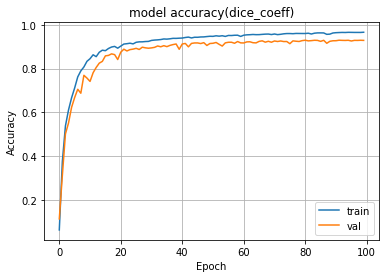

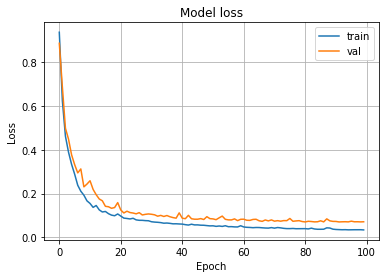

------------------------------
Loss and Accuracy
------------------------------
log_loss :  0.03370696540019485   Accuracy:  0.966854785035003
weighted log_loss :  0.10387720903775916   Weighted_accuracy:  0.9013359665371155
------------------------------
Model Performance
------------------------------
precision : 0.9372251489148863
recall : 0.9479455474817025
f1 score : 0.9425548663576708

true_p = 432849, false_p = 28992, true_neg = 17209110, false_neg = 23769
confuion matrix
[[17209110    28992]
 [   23769   432849]]



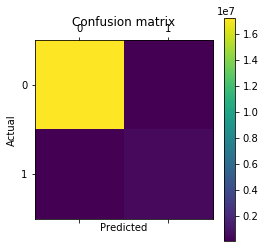

------------------------------
------------------------------
Number of Samples : 270, image size : 256 x 256 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [38, 53, 70, 87, 145, 151]
Sample Index of predictions with zero contours [2, 10, 13, 38, 50, 53, 72, 73, 87, 116, 118, 145, 188]
max-sigmoid values with zero contours [1.6407704e-06, 0.0013563345, 6.1758107e-07, 0.0076570255, 9.450403e-06, 0.01845, 0.0012587665, 3.6478505e-05, 0.016302234, 0.010078829, 0.005234217, 9.009214e-05, 0.00035304544]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 5 [38, 53, 87, 136, 145]
Sample Index where missed predictions >25% 38 [2, 5, 10, 13, 18, 21, 30, 50, 55, 70, 72, 73, 94, 106, 113, 116, 118, 131, 135, 151, 152, 174, 177, 184, 188, 191, 194, 202, 203, 207, 218, 223, 227, 228, 230, 239, 250, 269]
Sam

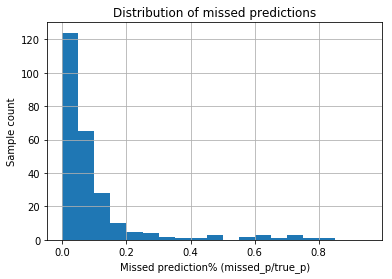

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


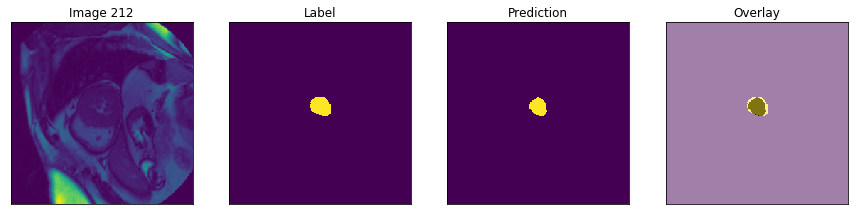

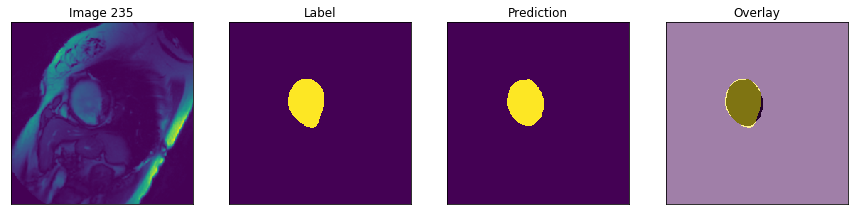

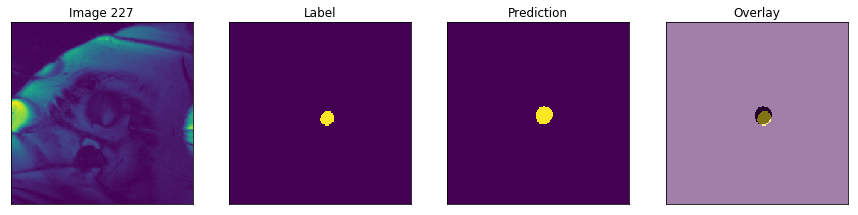

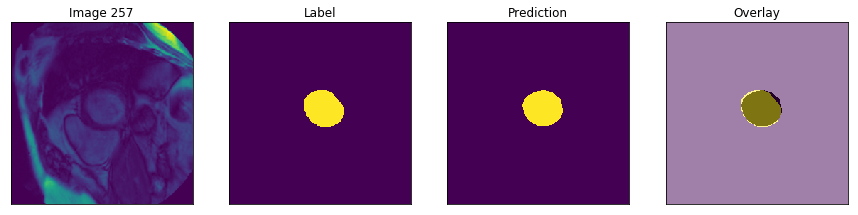

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


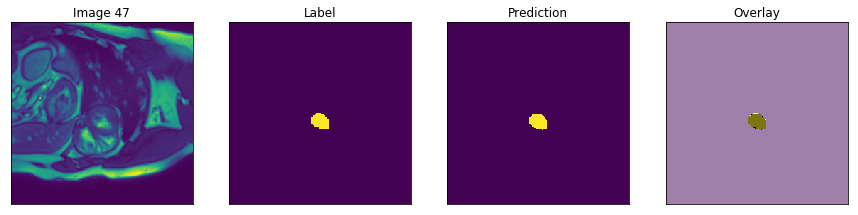

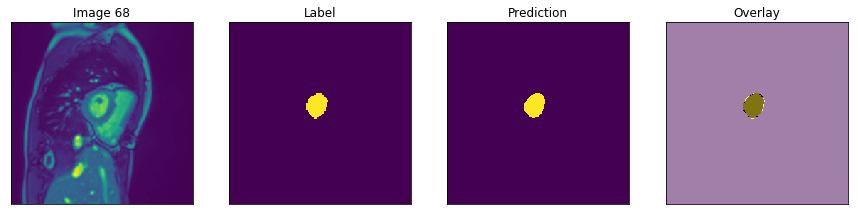

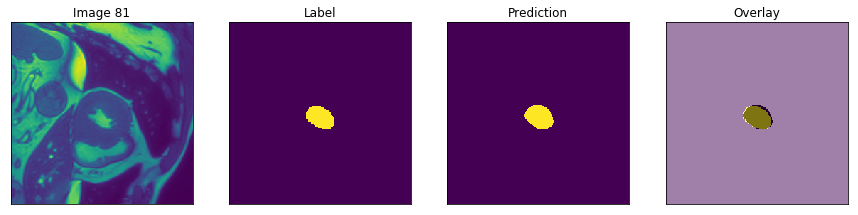

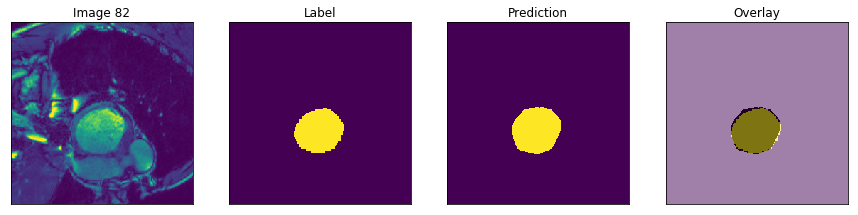

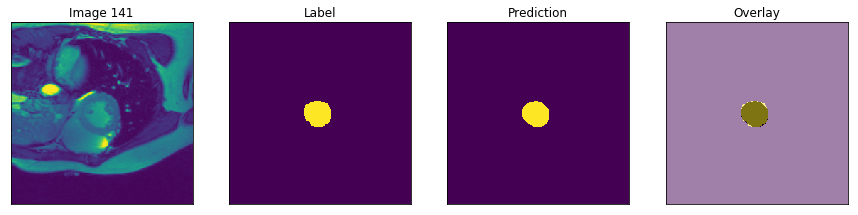

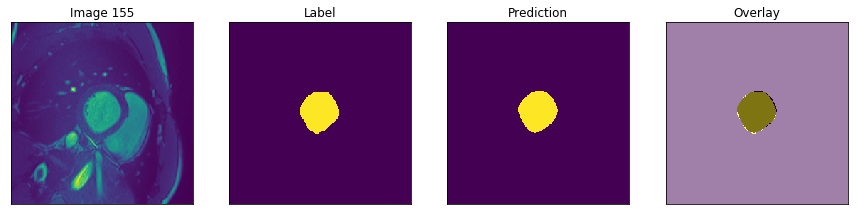

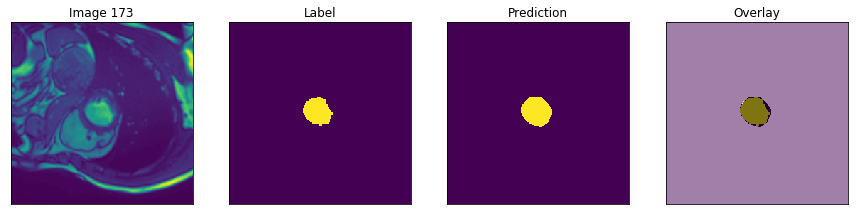

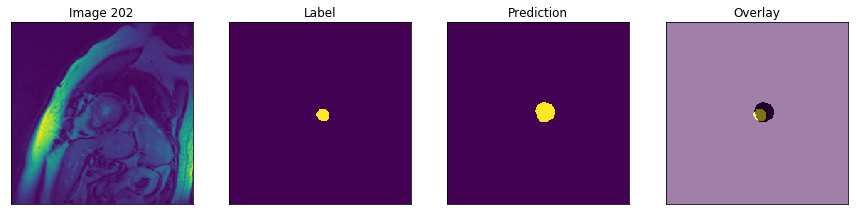

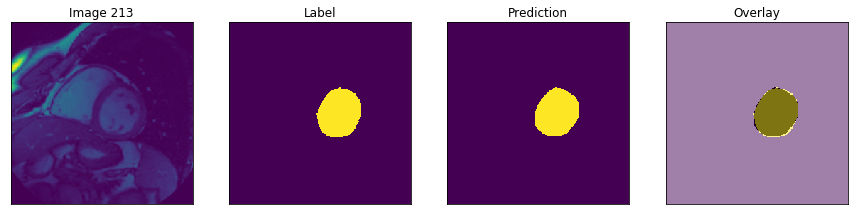

In [13]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


------------------------------
Model Parameters
tr_batchsize  :  32
tr_loss_fn  :  dice_loss
tr_size  :  9748
tr_dropout  :  False
tr_epoch  :  100
tr_lrrate  :  1e-05
tr_optimizer  :  Adam
tr_model_name  :  combined_1_3_0_256_aug_dice
------------------------------
Evaluation on Test set
eval_loss  :  0.9997060802247789
eval_binary_accuracy  :  0.9741965964988426
eval_dice_coeff  :  0.0002939221042820632
------------------------------
Values at first and last epoch
------------------------------
dice_coeff  :  0.3552384597883985 , 0.9741318110595394
val_binary_accuracy  :  0.978875748133048 , 0.9959368815177526
val_dice_coeff  :  0.5780966039192982 , 0.9483413615593543
val_loss  :  0.4219033970588293 , 0.05165863844064566
loss  :  0.6447615399746505 , 0.025868188940460606
binary_accuracy  :  0.7740360601310945 , 0.9975920093612936
------------------------------
------------------------------


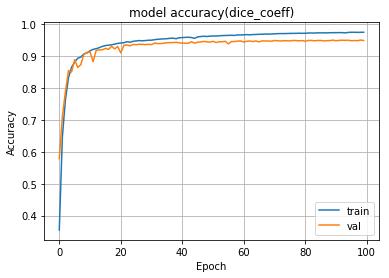

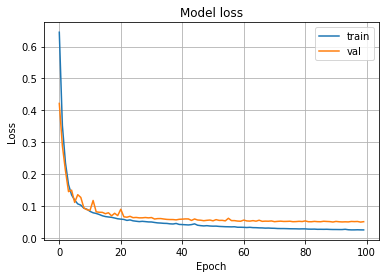

------------------------------
Loss and Accuracy
------------------------------
log_loss :  0.040009546753084185   Accuracy:  0.960780266776565
weighted log_loss :  0.12428350727211347   Weighted_accuracy:  0.8831294317719014
------------------------------
Model Performance
------------------------------
precision : 0.9510060956341138
recall : 0.9556609682491711
f1 score : 0.9533278498171979

true_p = 436372, false_p = 22481, true_neg = 17215621, false_neg = 20246
confuion matrix
[[17215621    22481]
 [   20246   436372]]



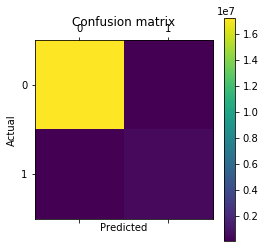

------------------------------
------------------------------
Number of Samples : 270, image size : 256 x 256 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [38, 53, 70, 87, 145, 151]
Sample Index of predictions with zero contours [2, 10, 13, 21, 50, 53, 70, 72, 86, 116, 118, 145, 188]
max-sigmoid values with zero contours [6.8126975e-09, 4.2800716e-07, 1.39336285e-08, 0.0020226606, 1.0246341e-08, 5.5630127e-05, 2.3597752e-11, 1.9599538e-06, 2.902094e-07, 4.725226e-05, 5.323372e-06, 4.0848978e-08, 1.2213764e-06]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 6 [53, 70, 74, 110, 145, 242]
Sample Index where missed predictions >25% 31 [2, 5, 10, 13, 21, 30, 38, 50, 55, 72, 73, 86, 87, 106, 113, 116, 118, 131, 151, 152, 174, 184, 188, 202, 203, 207, 226, 227, 228, 230, 269]
Sample Index where 

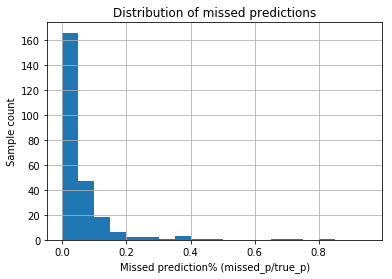

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


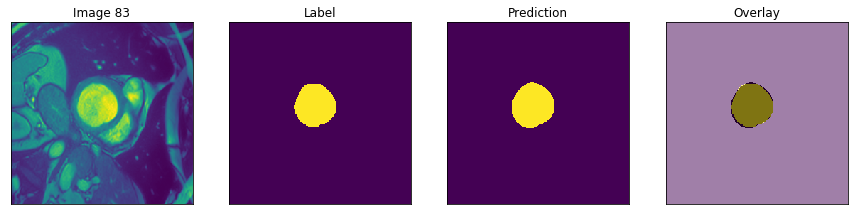

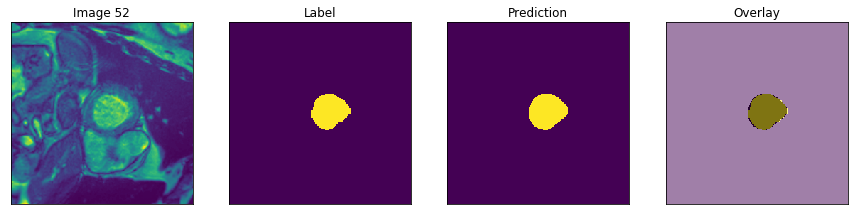

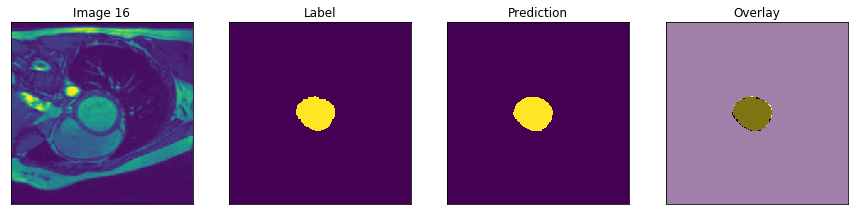

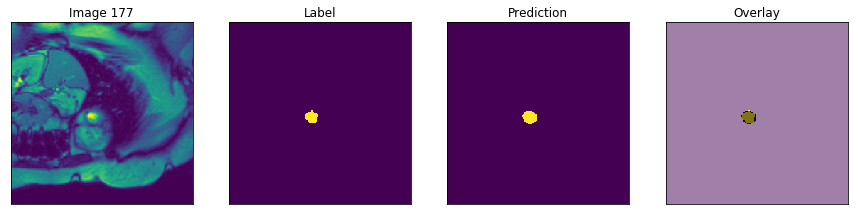

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


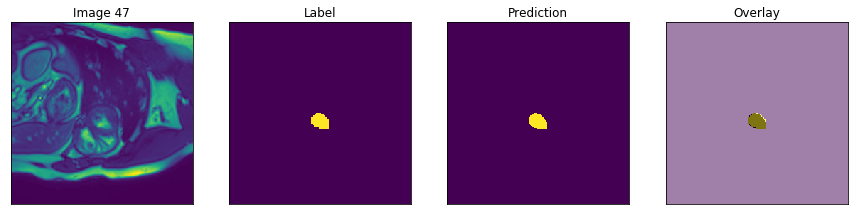

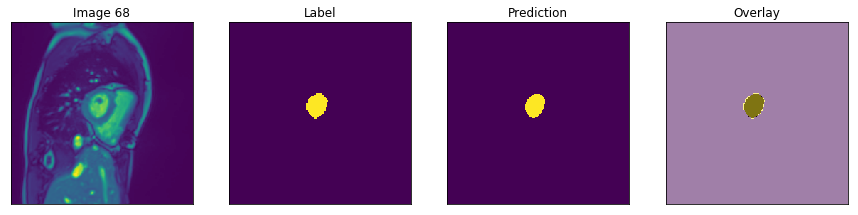

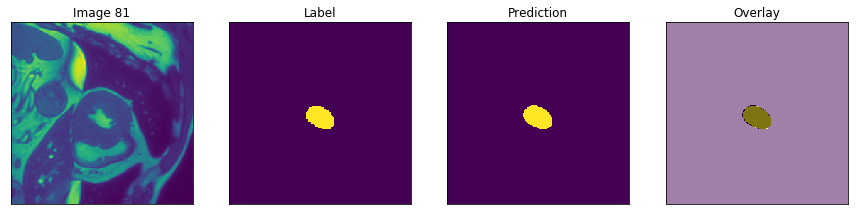

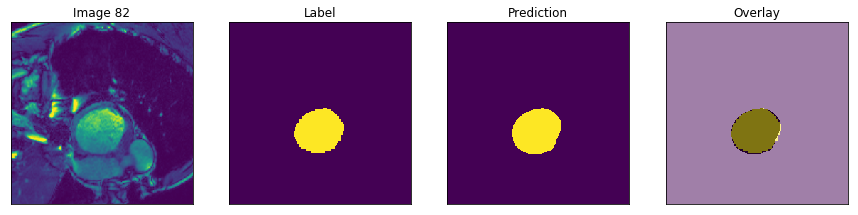

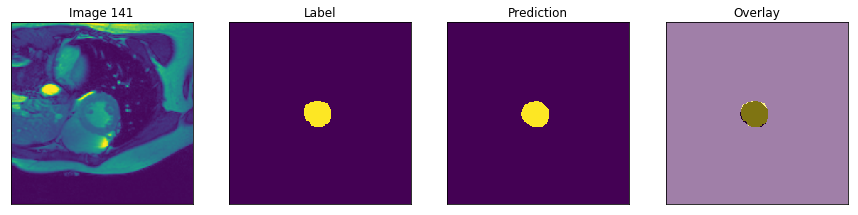

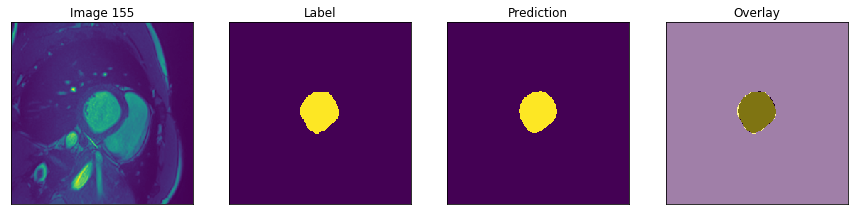

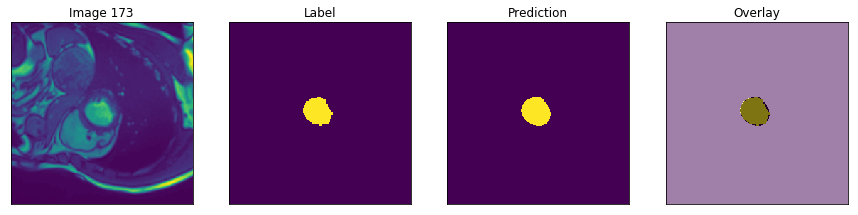

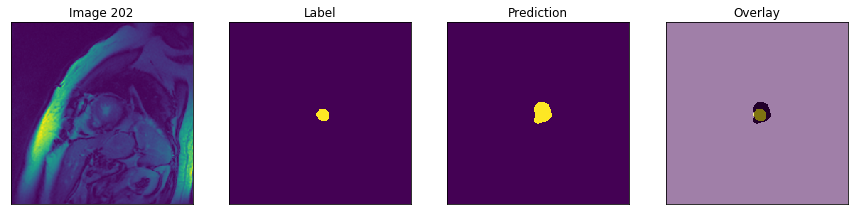

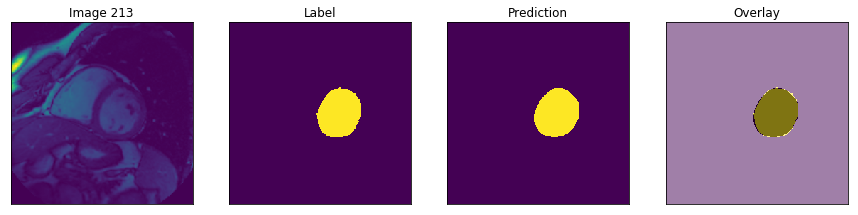

In [7]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_dice.hdf5" 
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


samples, max, min  270 1.0 0.0


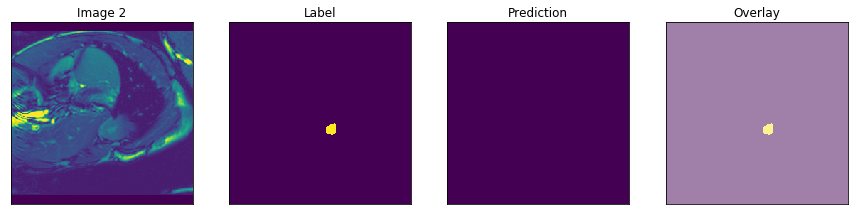

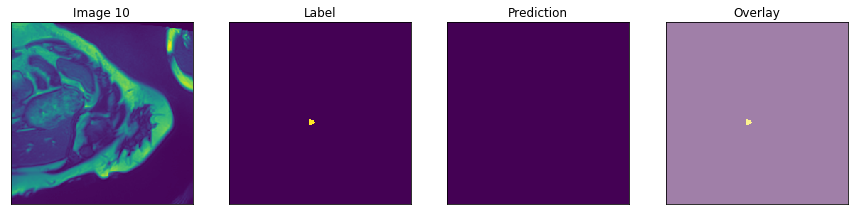

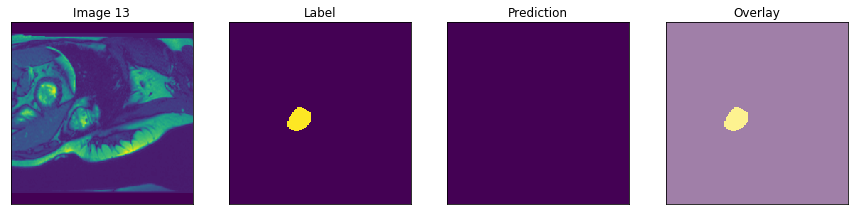

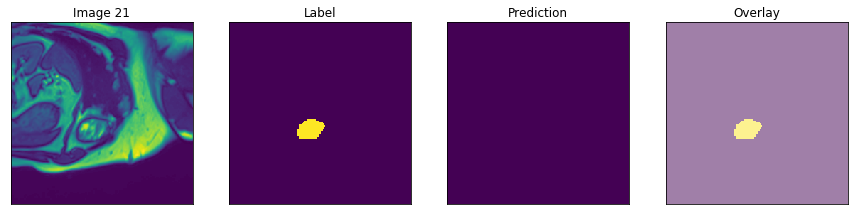

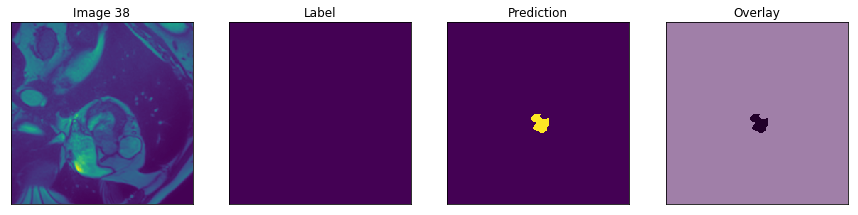

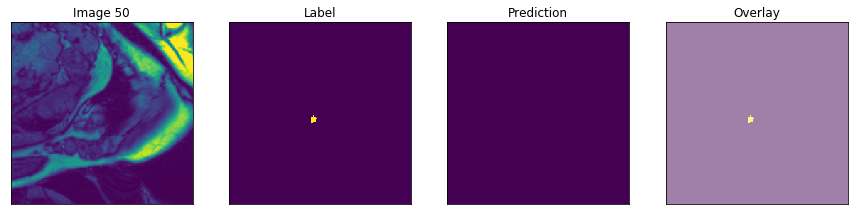

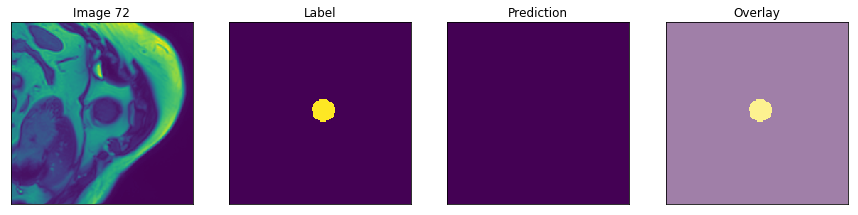

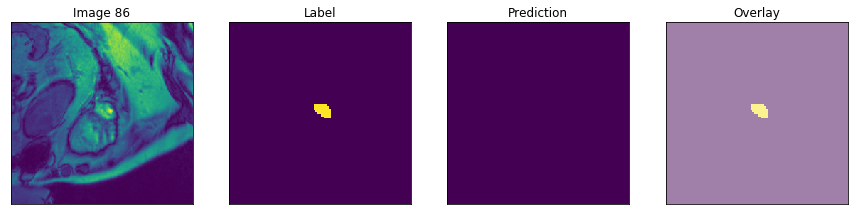

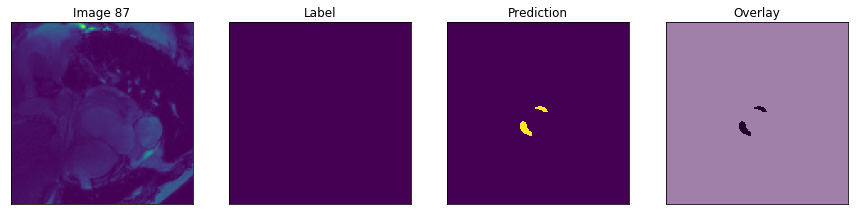

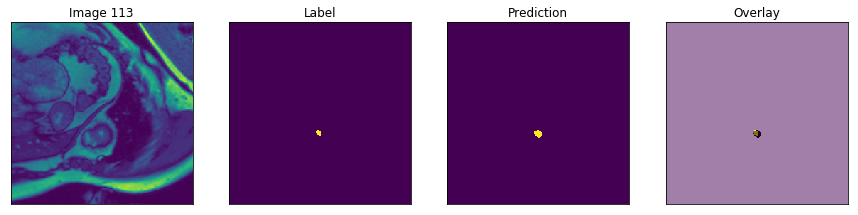

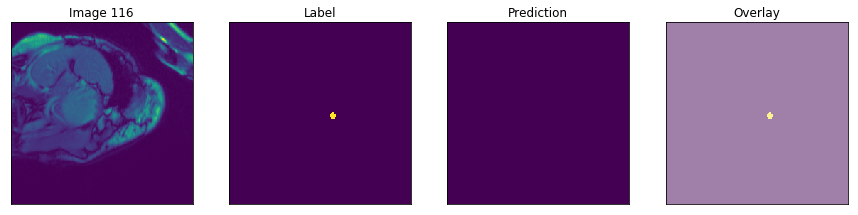

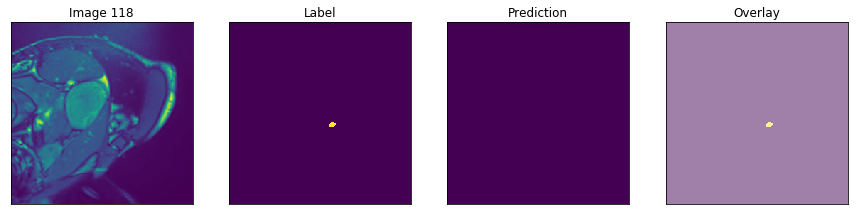

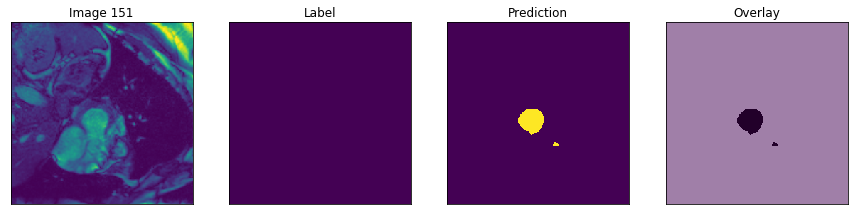

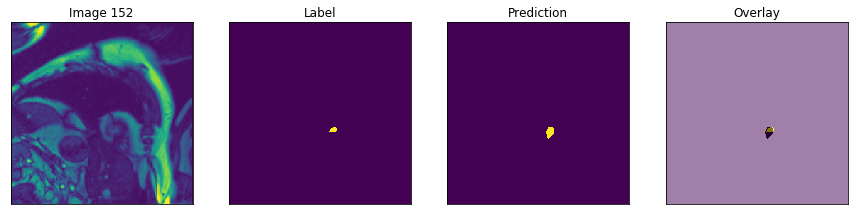

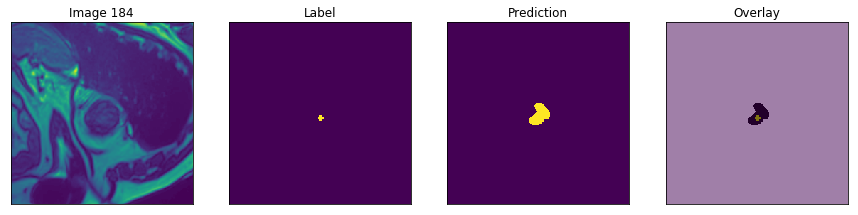

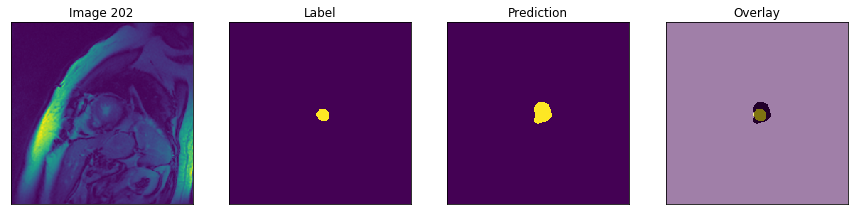

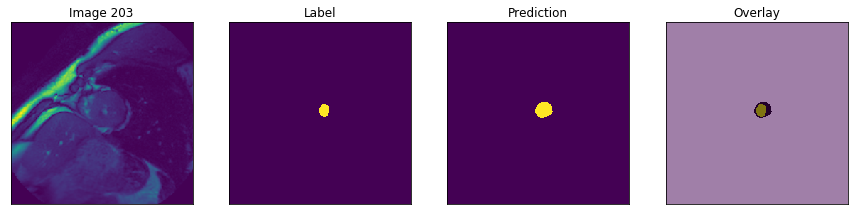

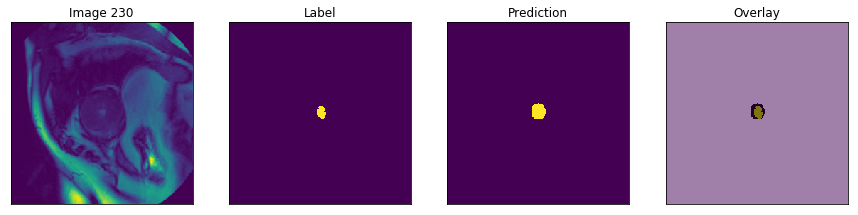

In [8]:
zcontour = [2, 10, 13, 21, 38, 50, 72, 86, 87, 113, 116, 118, 151, 152, 184, 202, 203, 230]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_drop_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_drop_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_drop_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_drop_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_drop_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_drop_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


## Analysis on training with 176x176  combined data set (ACDC + Sunnybrook)  ( no Labels with zero contours)
### (data set prefix combined_1_3_176)
### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_aug_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_aug_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_aug_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_drop_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_drop_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_drop_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_aug_drop_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_aug_drop_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_aug_drop_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
zcontour = [173, 188]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
zcontour = [55, 81, 82, 141]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

## Analysis on training with 176x176  combined data set (ACDC + Sunnybrook) + Labels with Zero Contours  
### (data set prefix combined_1_3_0_176)
### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

In [ ]:

weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
# zcontour = [8, 14, 20, 32, 39, 95, 135]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_aug_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_aug_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_aug_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
# Sample Index of labels with zero contours [8, 14, 20, 32, 39, 95, 135]
# Sample Index of predictions with zero contours [14, 20, 77, 95, 135, 169, 189]
# Sample Index where missed predictions >= 100% 6 [8, 32, 39, 77, 169, 189]
# zcontour = [8, 14, 20, 32, 39, 95, 135]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
# zcontour = [14, 20, 77, 95, 135, 169, 189]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
# zcontour = [8, 32, 39, 77, 169, 189]
# #display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)
# display_images_predictions (image_file,  pred_file, image_list = zcontour)

In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_drop_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_drop_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_drop_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [4, 8, 32, 39, 46, 63, 65, 77,]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)
#combined_1_3_0_176_drop_dice

In [ ]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_aug_drop_dice.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_aug_drop_dice_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_aug_drop_dice_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)
#combined_1_3_0_176_drop_dice

In [ ]:
# zcontour = [8, 14, 20, 32, 39, 95, 135]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
# #zcontour = [14, 20, 46, 65, 77, 102, 104, 154, 169, 189]
# zcontour = [14, 20, 63, 77, 95, 104, 135, 169, 189, 198, 212]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
## 

## 176x176 images.. Training with BatchNormalization

------------------------------
Model Parameters
tr_batchsize  :  32
tr_loss_fn  :  dice_loss
tr_size  :  2437
tr_dropout  :  False
tr_lrrate  :  2e-05
tr_optimizer  :  Adam
tr_model_name  :  1_3_0_176_bn
tr_epoch  :  80
------------------------------
Evaluation on Test set
eval_loss  :  0.8392327343976056
eval_binary_accuracy  :  0.9531773717315108
eval_dice_coeff  :  0.16076726640264194
------------------------------
Values at first and last epoch
------------------------------
dice_coeff  :  0.19815574132246258 , 0.9353868082708552
val_binary_accuracy  :  0.8506470625517798 , 0.991470853813359
val_dice_coeff  :  0.3013947049125296 , 0.8997654524005827
val_loss  :  0.6986052950874704 , 0.10023454759941726
binary_accuracy  :  0.8057701649758803 , 0.9985139520734686
loss  :  0.8018442625691182 , 0.06461319172914484
------------------------------
------------------------------


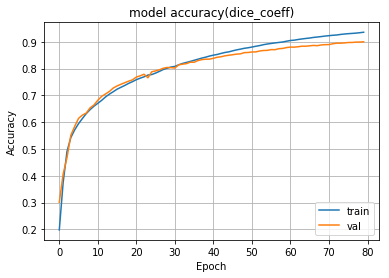

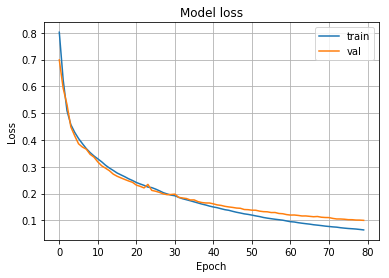

------------------------------
Loss and Accuracy
------------------------------
log_loss :  0.049504346844481115   Accuracy:  0.9517010212311391
weighted log_loss :  0.08817106308714319   Weighted_accuracy:  0.9156042372386672
------------------------------
Model Performance
------------------------------
precision : 0.942772491230641
recall : 0.9398222857260242
f1 score : 0.9412950768516815

true_p = 411754, false_p = 24994, true_neg = 7900407, false_neg = 26365
confuion matrix
[[7900407   24994]
 [  26365  411754]]



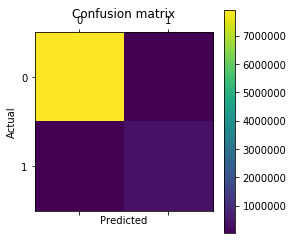

------------------------------
------------------------------
Number of Samples : 270, image size : 176 x 176 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [8, 14, 20, 32, 39, 95, 135]
Sample Index of predictions with zero contours [4, 14, 20, 63, 65, 77, 95, 104, 135, 144, 169, 198]
max-sigmoid values with zero contours [0.014723626, 0.015035834, 0.014880848, 0.00840205, 0.015047567, 0.013707362, 0.014917276, 0.04544372, 0.1849132, 0.08621434, 0.3701895, 0.014988734]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 6 [11, 14, 20, 33, 95, 135]
Sample Index where missed predictions >25% 39 [4, 8, 13, 32, 39, 43, 46, 51, 54, 59, 63, 65, 67, 77, 83, 88, 91, 92, 102, 104, 116, 120, 144, 146, 154, 169, 198, 200, 201, 209, 219, 223, 230, 236, 249, 250, 255, 263, 268]
Sample Index where missed pred

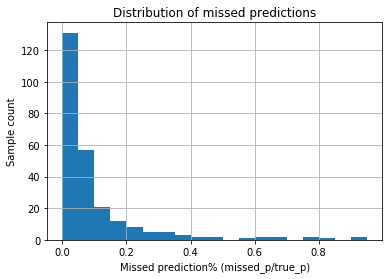

------------------------------
------------------------------
samples, max, min  270 1.0 0.0017652839


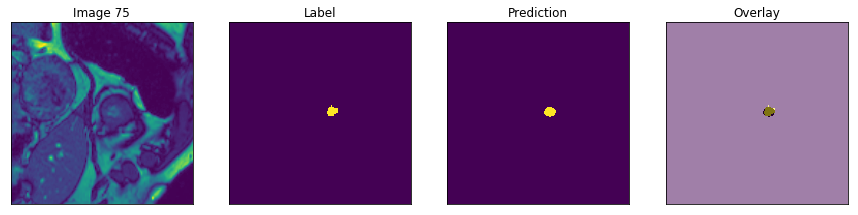

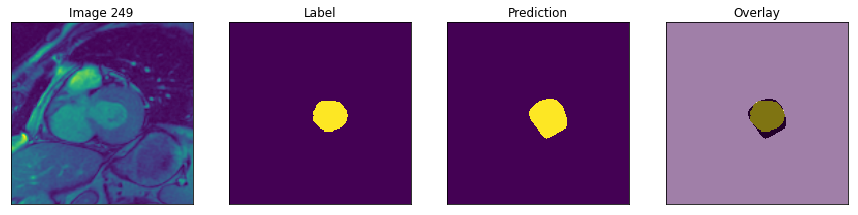

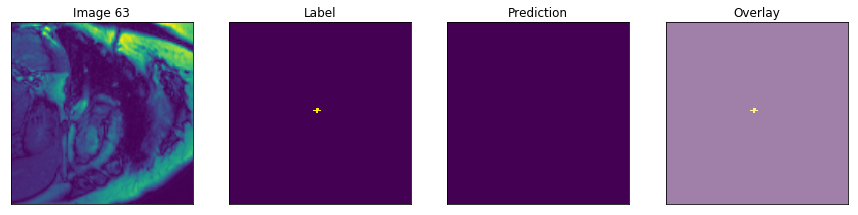

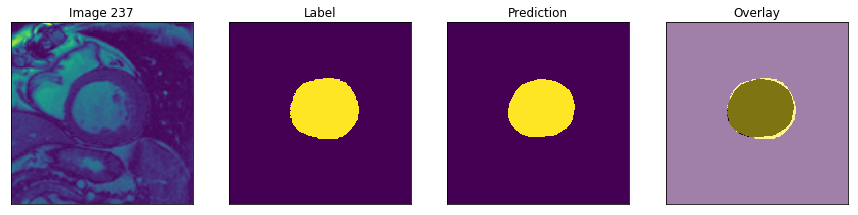

------------------------------
------------------------------
samples, max, min  270 1.0 0.0017652839


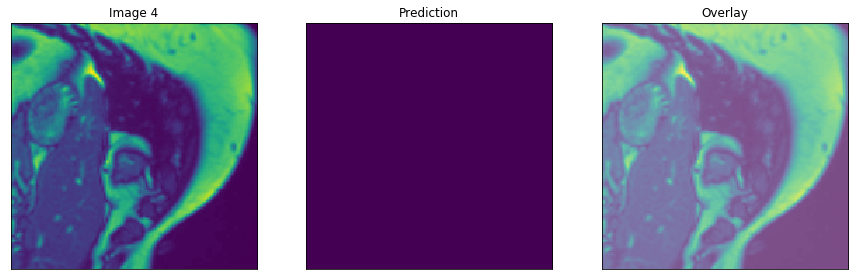

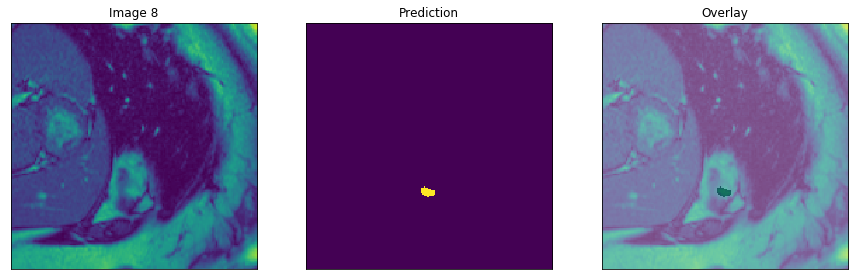

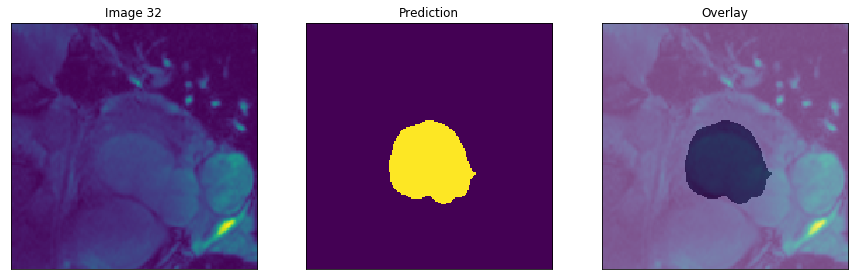

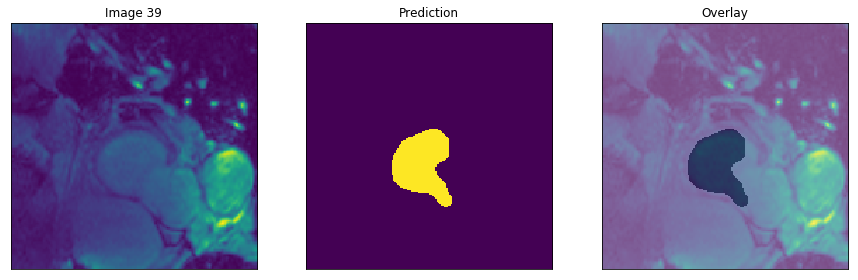

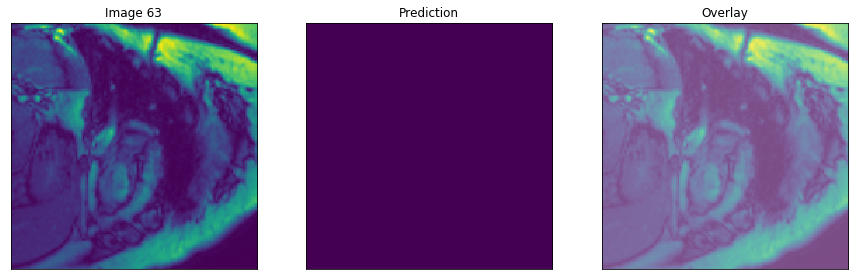

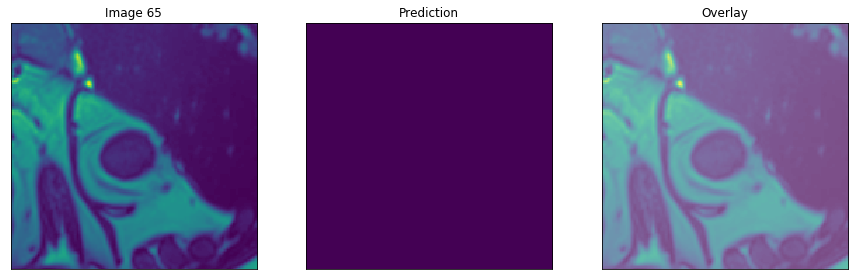

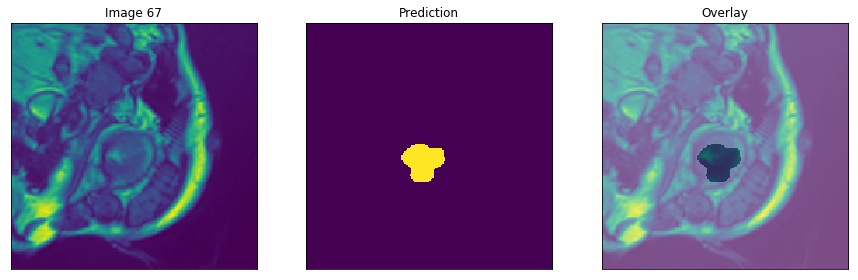

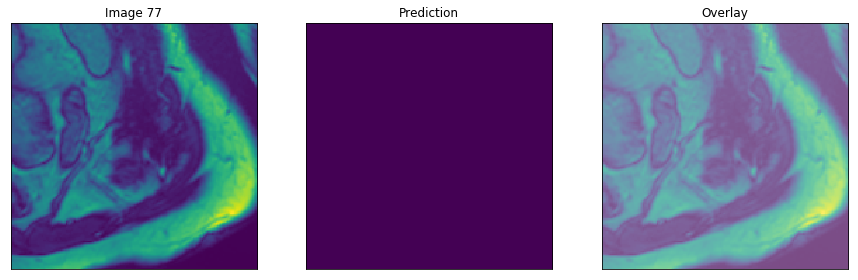

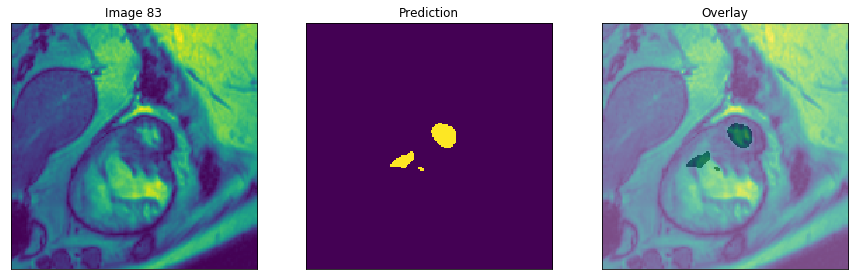

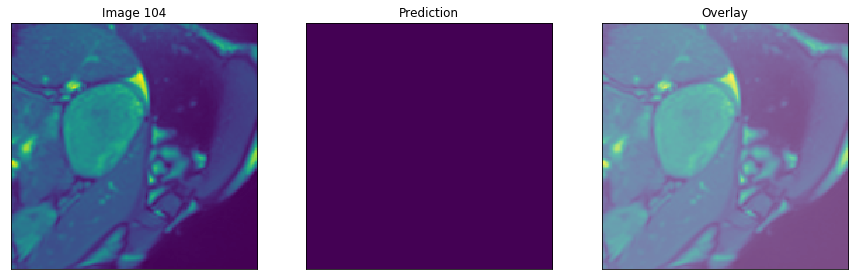

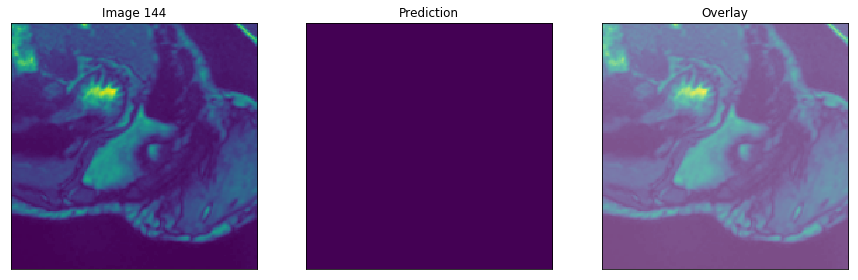

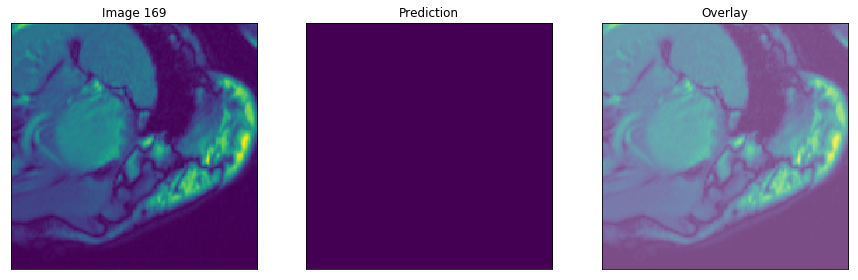

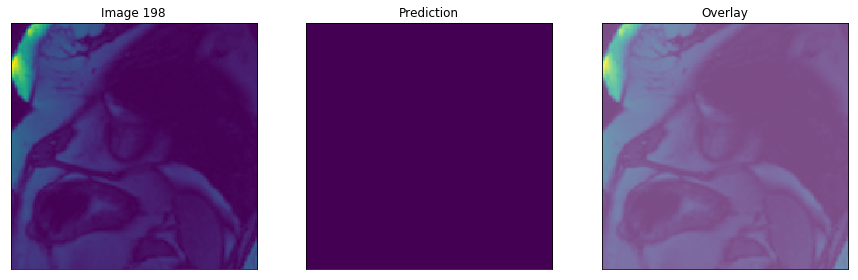

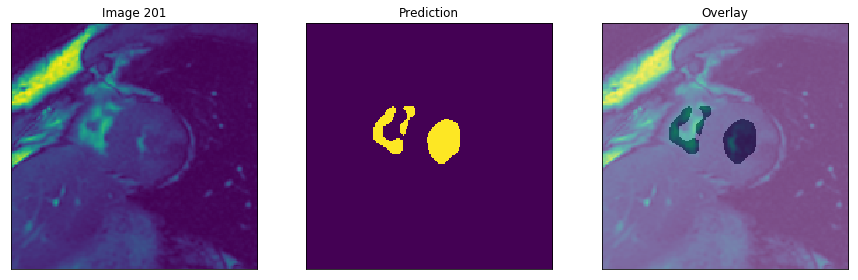

In [10]:
weights_file = "/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [4, 8, 32, 39, 63, 65, 67, 77, 83, 104, 144, 169, 198, 201]
display_images_predictions (image_file, pred_file, image_list = zcontour)
#combined_1_3_0_176_drop_dice

In [ ]:
zcontour = [8, 32, 39, 77, 169, 189]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

------------------------------
Model Parameters
tr_batchsize  :  32
tr_loss_fn  :  dice_loss
tr_dropout  :  True
tr_epoch  :  80
tr_lrrate  :  2e-05
tr_optimizer  :  Adam
tr_size  :  2437
tr_model_name  :  1_3_0_176_bn_drop
------------------------------
Evaluation on Test set
eval_loss  :  0.9686124929675349
eval_binary_accuracy  :  0.9479959395196703
eval_dice_coeff  :  0.03138750717043877
------------------------------
Values at first and last epoch
------------------------------
loss  :  0.8572330076062049 , 0.15910862980285262
dice_coeff  :  0.14276698899152893 , 0.8408913701971474
val_binary_accuracy  :  0.46213031938818633 , 0.9917821063370001
val_loss  :  0.8224110026828578 , 0.16152422936236271
val_dice_coeff  :  0.17758899804998618 , 0.8384757706376372
binary_accuracy  :  0.4419707139373865 , 0.9975999542356699
------------------------------
------------------------------


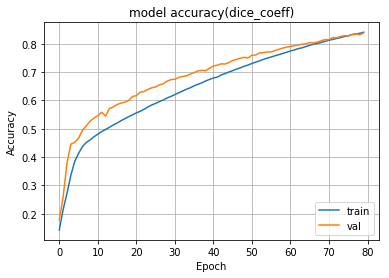

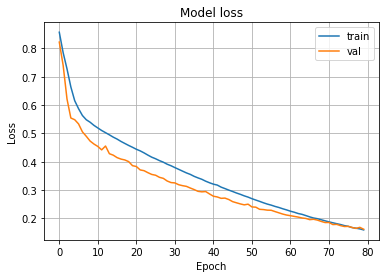

------------------------------
Loss and Accuracy
------------------------------
log_loss :  0.05044703120957591   Accuracy:  0.9508042902917049
weighted log_loss :  0.08533919566776593   Weighted_accuracy:  0.9182007818469438
------------------------------
Model Performance
------------------------------
precision : 0.954010359441218
recall : 0.9294871941184929
f1 score : 0.9415891307966926

true_p = 407226, false_p = 19631, true_neg = 7905770, false_neg = 30893
confuion matrix
[[7905770   19631]
 [  30893  407226]]



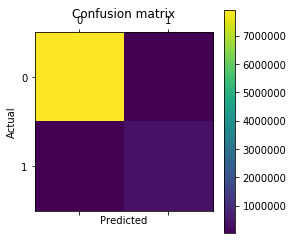

------------------------------
------------------------------
Number of Samples : 270, image size : 176 x 176 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [8, 14, 20, 32, 39, 95, 135]
Sample Index of predictions with zero contours [4, 8, 14, 20, 46, 63, 77, 95, 104, 135, 169, 189]
max-sigmoid values with zero contours [0.036786377, 0.033975244, 0.033313245, 0.035506237, 0.036836896, 0.03649229, 0.033677597, 0.03625485, 0.03549939, 0.035321448, 0.047028724, 0.03938271]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 6 [8, 14, 20, 95, 111, 135]
Sample Index where missed predictions >25% 38 [4, 13, 32, 35, 39, 46, 51, 54, 63, 65, 67, 75, 77, 91, 102, 104, 108, 116, 120, 144, 146, 164, 166, 169, 174, 189, 198, 200, 201, 208, 209, 219, 223, 230, 245, 254, 263, 266]
Sample Index where missed pre

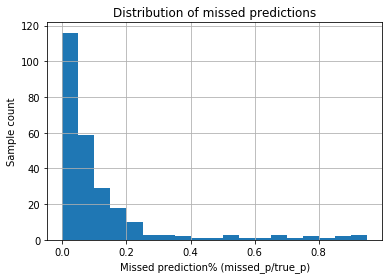

------------------------------
------------------------------
samples, max, min  270 1.0 0.0030633719


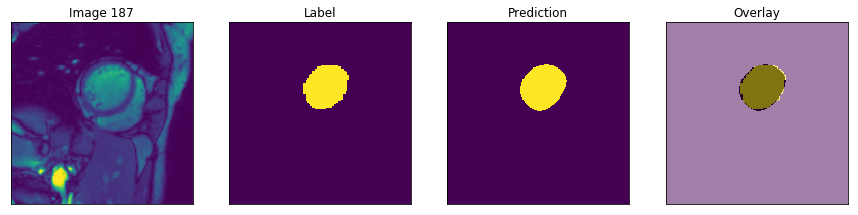

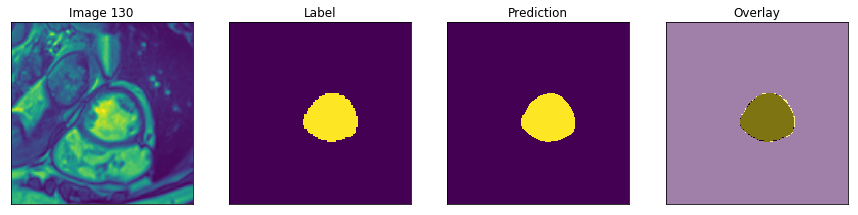

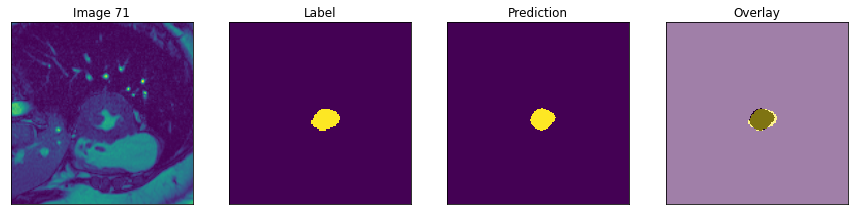

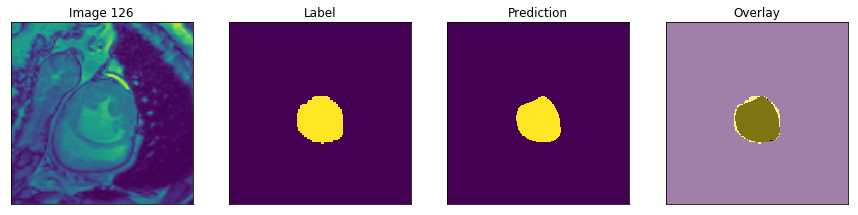

------------------------------
------------------------------
samples, max, min  270 1.0 0.0030633719


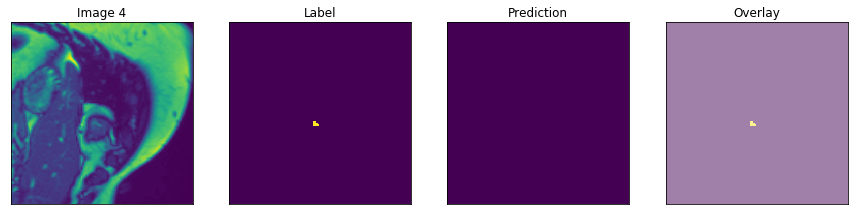

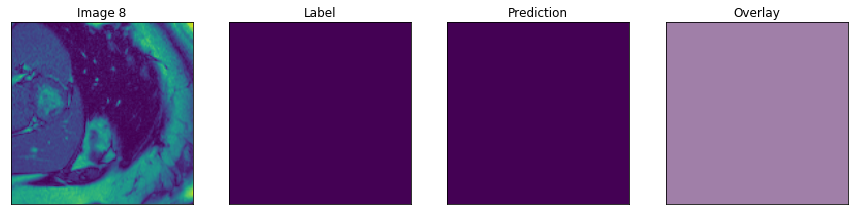

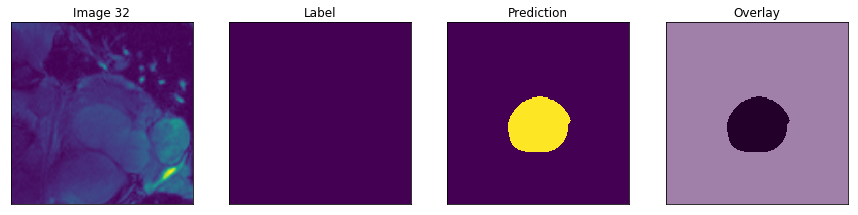

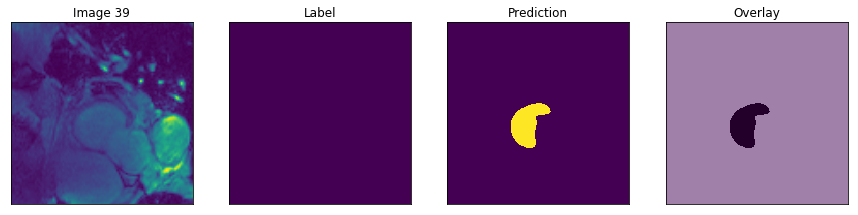

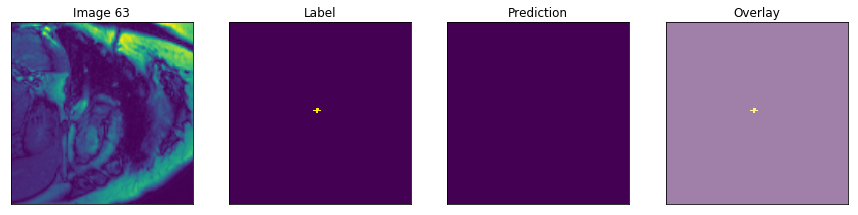

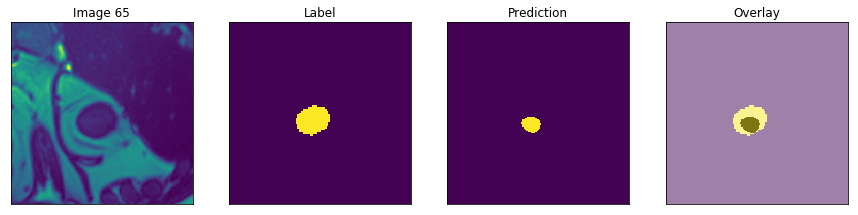

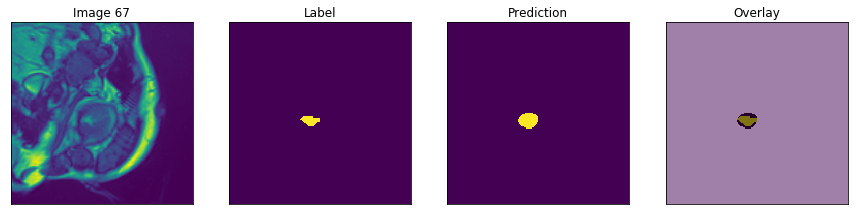

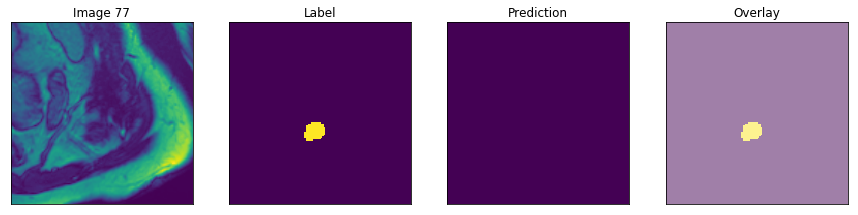

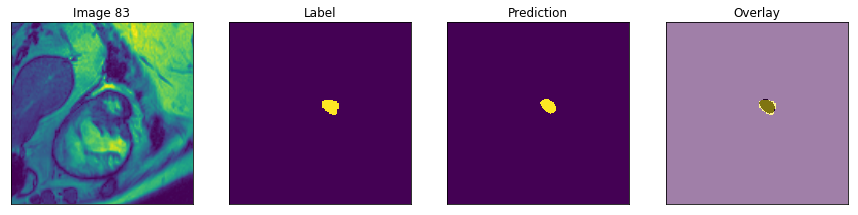

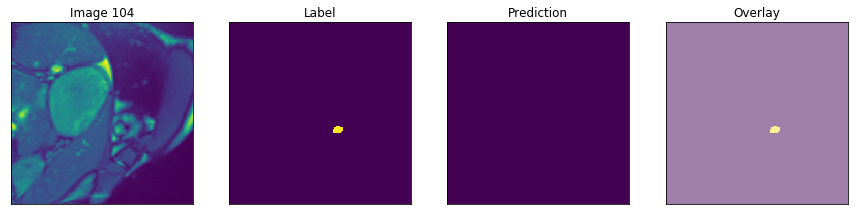

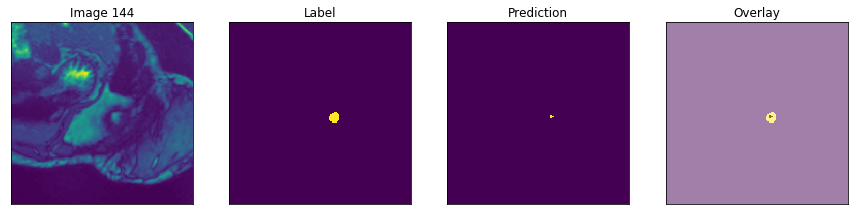

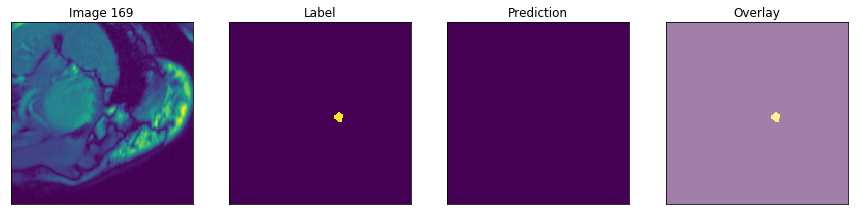

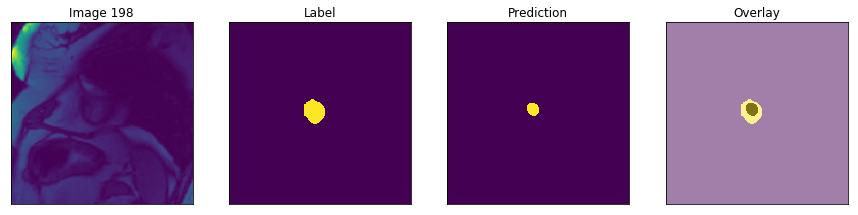

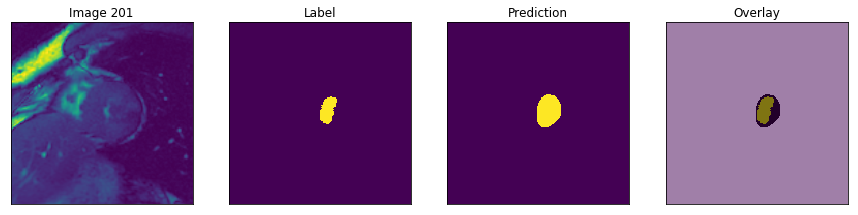

In [12]:
#'1_3_0_176_bn_drop_learning_history.json'
weights_file = "/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn_drop.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn_drop_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn_drop_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [4, 8, 32, 39, 63, 65, 67, 77, 83, 104, 144, 169, 198, 201]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)
#combined_1_3_0_176_drop_dice

------------------------------
Model Parameters
tr_batchsize  :  32
tr_loss_fn  :  dice_loss
tr_dropout  :  False
tr_lrrate  :  0.0001
tr_optimizer  :  Adam
tr_size  :  2437
tr_model_name  :  1_3_0_176_bn2
tr_epoch  :  100
------------------------------
Evaluation on Test set
eval_loss  :  0.7840192154601768
eval_binary_accuracy  :  0.6984928612355833
eval_dice_coeff  :  0.21598078597474982
------------------------------
Values at first and last epoch
------------------------------
val_dice_coeff  :  0.3243970441036537 , 0.3962210133427479
dice_coeff  :  0.3588879891638269 , 0.9528606175275385
val_binary_accuracy  :  0.8068077925775872 , 0.8228799993874597
loss  :  0.6411120105915158 , 0.04713938247246153
val_loss  :  0.675602957850597 , 0.6037789847030014
binary_accuracy  :  0.9073606260071173 , 0.9955702955261629
------------------------------
------------------------------


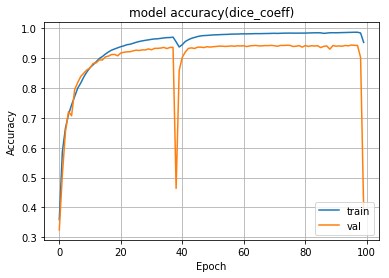

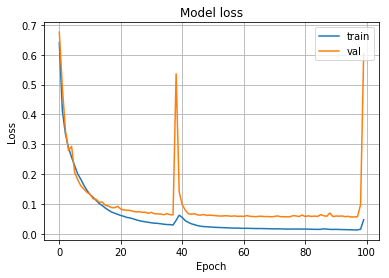

------------------------------
Loss and Accuracy
------------------------------
log_loss :  1.9506823510975   Accuracy:  0.1421770238317072
weighted log_loss :  1.7241445373122986   Weighted_accuracy:  0.1783255373842202
------------------------------
Model Performance
------------------------------
precision : 0.22694846308145725
recall : 0.9245068120761711
f1 score : 0.36443517110172086

true_p = 405044, false_p = 1379696, true_neg = 6545705, false_neg = 33075
confuion matrix
[[6545705 1379696]
 [  33075  405044]]



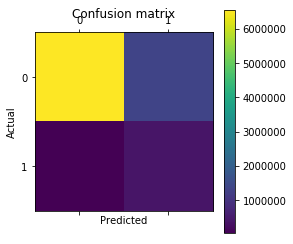

------------------------------
------------------------------
Number of Samples : 270, image size : 176 x 176 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [8, 14, 20, 32, 39, 95, 135]
Sample Index of predictions with zero contours []
max-sigmoid values with zero contours []
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 0 []
Sample Index where missed predictions >25% 270 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106,

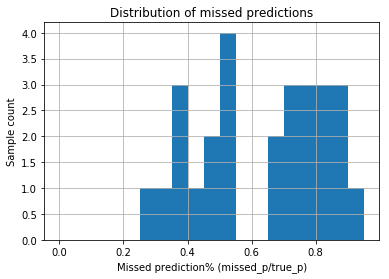

------------------------------
------------------------------
samples, max, min  270 1.0 1.2922887e-06


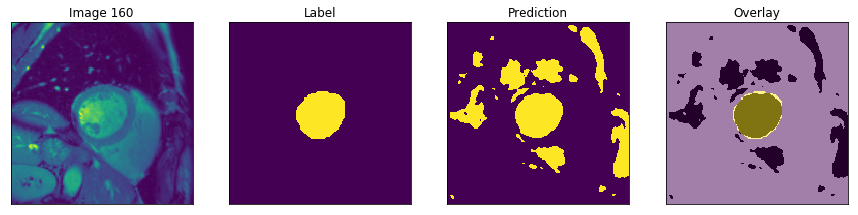

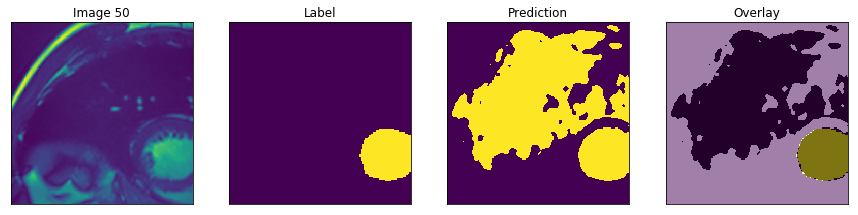

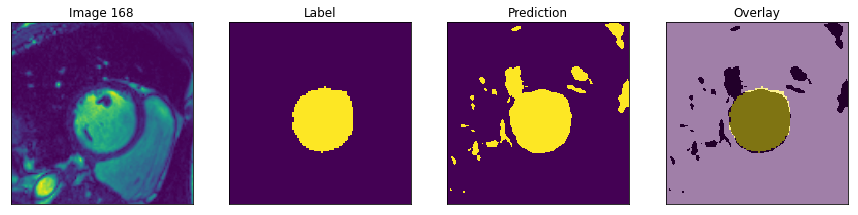

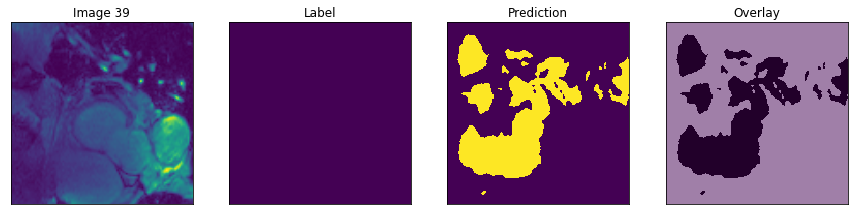

------------------------------
------------------------------
samples, max, min  270 1.0 1.2922887e-06


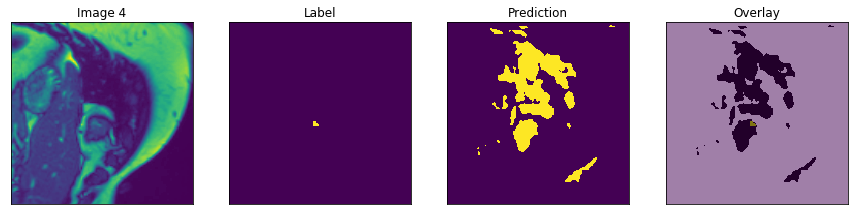

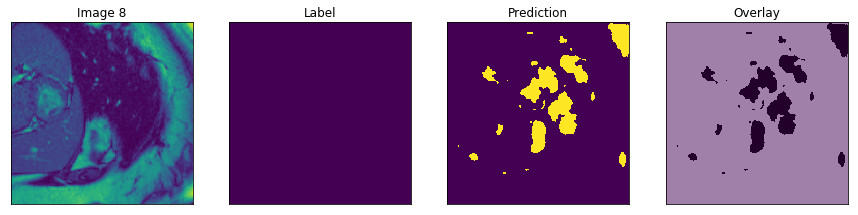

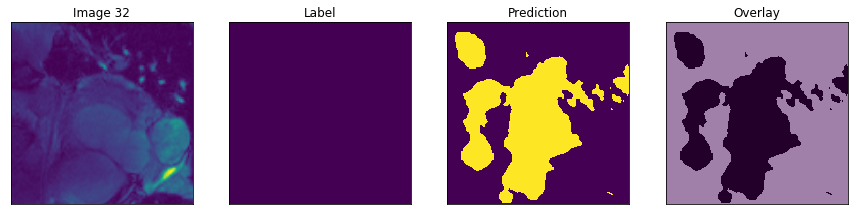

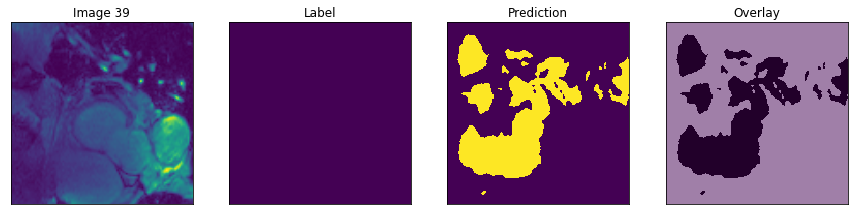

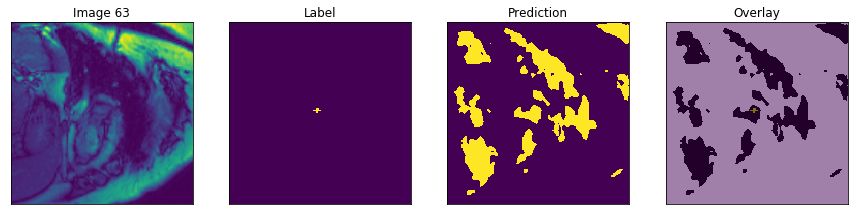

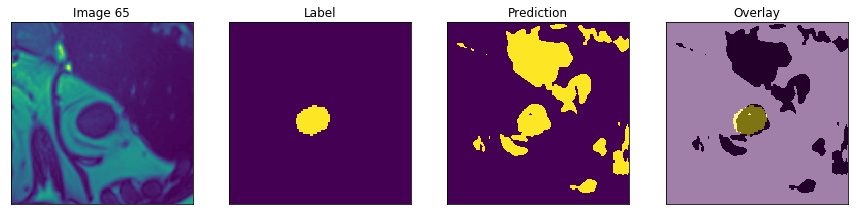

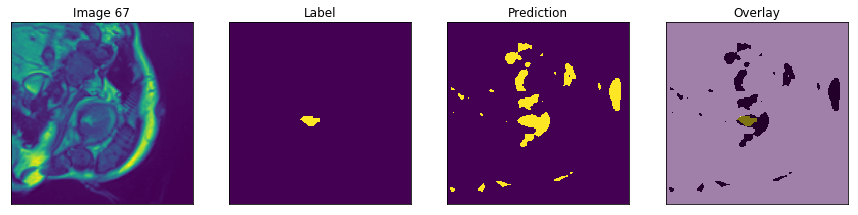

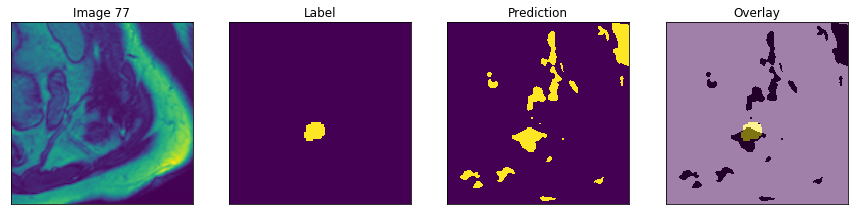

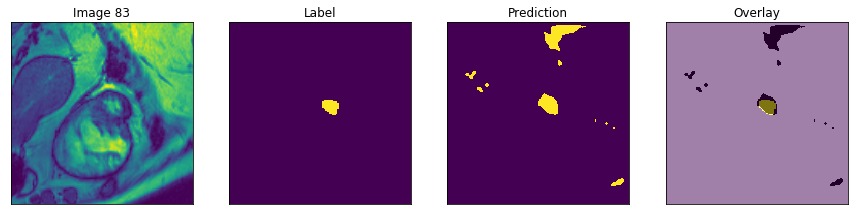

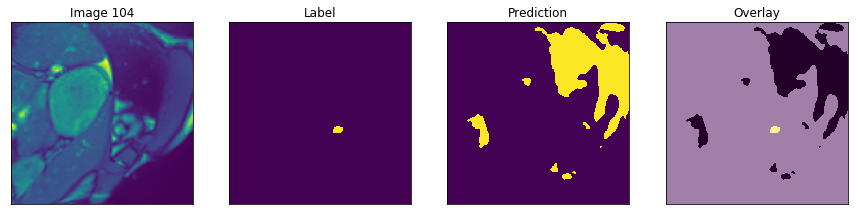

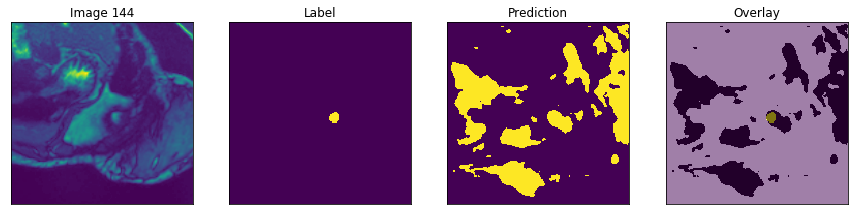

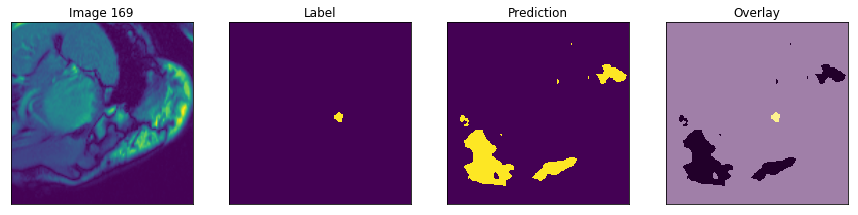

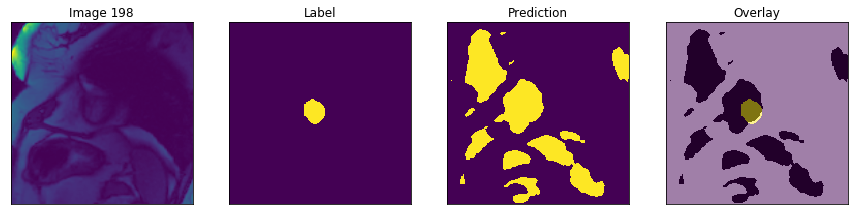

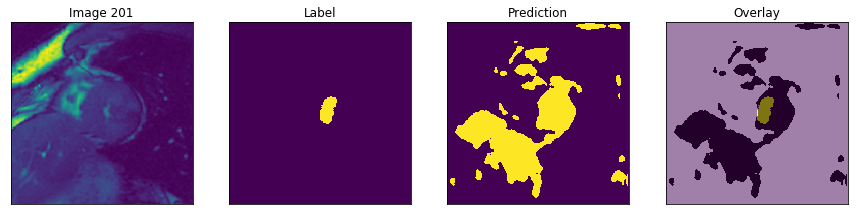

In [14]:
#'1_3_0_176_bn_drop_learning_history.json'
weights_file = "/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn2.hdf5"
history_file = '/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn2_learning_history.json'
image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn2_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [4, 8, 32, 39, 63, 65, 67, 77, 83, 104, 144, 169, 198, 201]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)
#combined_1_3_0_176_drop_dice

## Analysis of predictions on  DSB data set (256x256  images)

In [ ]:
image_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_test_images.npy"
pred_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_predictions.npy"
find_outliers_in_prediction(pred_file)
display_images_predictions (image_file, pred_file, num_images = 4, random_images = True)
print ("-"*30)
imglist = [21, 84, 127]
display_images_predictions (image_file, pred_file, image_list = imglist)


## Analysis of predictions on  DSB data set (176x176  images)

In [ ]:
image_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_176_test_images.npy"
pred_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_176_predictions.npy"
find_outliers_in_prediction(pred_file)
display_images_predictions (image_file, pred_file, num_images = 4, random_images = True)
print ("-"*30)
print ("-"*30)
imglist = [173]
display_images_predictions (image_file, pred_file, image_list = imglist)